# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

## Step 1 - Loading the Dataset

In [6]:
# importing libraries
import os
import glob
import pandas as pd
os.chdir("C:\\Users\Elite\Downloads\Data-Analysis-Project-main\Data-Analysis-Project-main")

In [7]:
# using glob to match the pattern "csv"
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [24]:
# combining all the files in the generated list above
all_branches = pd.concat([pd.read_csv(f) for f in all_filenames ])
#exporting to csv
all_branches.to_csv( "all_branches.csv", index=False, encoding='utf-8-sig')
# Note: encoding = ‘utf-8-sig’ is added to overcome the issue when exporting ‘Non-English’ languages

In [25]:
# reading the csv file
df = pd.read_csv('all_branches.csv')

## Step 2 - Data Exploration
In this step the loaded dataset is explored using some built-in Pandas function.

In [26]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [29]:
# viewing the first 5 rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [32]:
# checking the number of rows and columns present in the data
df.shape
# Note: it returns a tuple with the first number representing the number of rows and the second, the number of columns

(1000, 17)

In [35]:
# generating the names of the columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [40]:
# provides a quick overview (summary) of the missing data occurence
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [41]:
# provides a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features
From the summary above, it is observed that the date and time columns are not in the appropriate data type.

In [42]:
# converting the date column to datetime
df["Date"]= pd.to_datetime(df["Date"])

In [48]:
# checking the datatype to confirm if it's in datetime
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [49]:
# converting the time column to datetime
df["Time"]= pd.to_datetime(df["Time"])

In [51]:
# checking the datatype to confirm if it's in datetime
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [52]:
# extracting the Day feature from the Date column and save to a new Day column
df["Day"] = df["Date"].apply(lambda time: time.dayofweek)

In [53]:
# extracting the Month feature from the Date column and save to a new Month column
df["Month"] = df["Date"].apply(lambda time: time.month)

In [54]:
# extracting the Year feature from the Date column and save to a new Year column
df["Year"] = df["Date"].apply(lambda time: time.year)

In [56]:
# extracting the Hour feature from the Time column and save to a new Hour column
df["Hour"] = df["Time"].apply(lambda time: time.hour)

In [57]:
# determining the numbers of unique hours of sales in the supermarket
df["Hour"].nunique()

11

In [60]:
# returning an array of unique hours of sales in the supermarket
df["Hour"].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

In [61]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [68]:
# generating the unique values in the categorical columns gotten above
print("Total Number of unique values in the Invoice ID Column : %d" %(len(df['Invoice ID'].unique().tolist())))
print("Total Number of unique values in the City Column : %d" %(len(df['City'].unique().tolist())))
print("Total Number of unique values in the Customer type Column : %d" %(len(df['Customer type'].unique().tolist())))
print("Total Number of unique values in the Gender Column : %d" %(len(df['Gender'].unique().tolist())))
print("Total Number of unique values in the Product line Column : %d" %(len(df['Product line'].unique().tolist())))
print("Total Number of unique values in the Payment Column : %d" %(len(df['Payment'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000
Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Payment Column : 3


In [69]:
# to get a Series containing counts of unique values of Invoice ID column
df['Invoice ID'].value_counts()

319-50-3348    1
598-47-9715    1
870-54-3162    1
250-17-5703    1
642-30-6693    1
              ..
333-23-2632    1
775-72-1988    1
840-19-2096    1
587-03-7455    1
802-70-5316    1
Name: Invoice ID, Length: 1000, dtype: int64

In [70]:
# to get a Series containing counts of unique values of Branch column
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [71]:
# to get a Series containing counts of unique values of City column
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [72]:
# to get a Series containing counts of unique values of Customer type column
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [73]:
# to get a Series containing counts of unique values of Gender column
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [74]:
# to get a Series containing counts of unique values of Product line column
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [75]:
# to get a Series containing counts of unique values of Payment column
df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

In [76]:
# creating a groupby object with the "City Column" and aggregation function of sum 
df.groupby("City").sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,999,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,1037,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,996,640,662232,4894


In [77]:
# creating a groupby object with the "City Column" and aggregation function of mean
df.groupby("City").mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,3.009036,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,3.050000,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,3.036585,1.951220,2019.0,14.920732


In [100]:
# using the groupby object, a table that shows the gross income of each city is displayed
df.groupby("City").sum()[['gross income']]

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


### Looking  at the above code, the city with the highest income is Port Harcourt

In [115]:
# using the groupby object, a table that shows the Unit price of each city is displayed
df.groupby("City").sum()[['Unit price']]

,Unit price
City,
Abuja,6652396.8
Lagos,6705176.4
Port Harcourt,6684393.6


### Looking at the above code, the city with the highest unit price is Lagos

In [116]:
# using the groupby object, a table that shows the Quantity of each city is displayed
df.groupby("City").sum()[['Quantity']]

,Quantity
City,
Abuja,1820
Lagos,1859
Port Harcourt,1831


### Looking at the above code, the city with the highest quantity is Lagos

## Step 6 - Data Visualization

[Text(0.5, 1.0, "Countplot for City's sales record")]

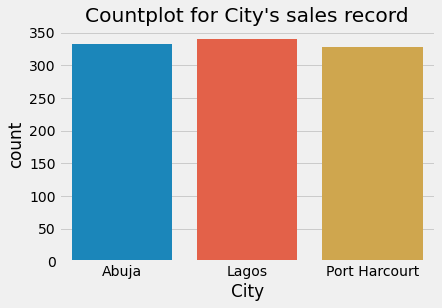

In [124]:
sns.countplot(x='City',data=df).set(title="Countplot for City's sales record")

[Text(0.5, 1.0, 'Payment record for PortHarcourt')]

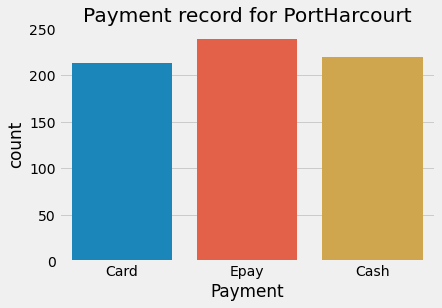

In [134]:
# countplot is used to determine the most used payment method for the city with the highest sales record
sns.countplot(x='Payment',data=df.loc[df['City']!="Port Harcourt"]).set(title="Payment record for PortHarcourt")

[Text(0.5, 1.0, 'Counting product line')]

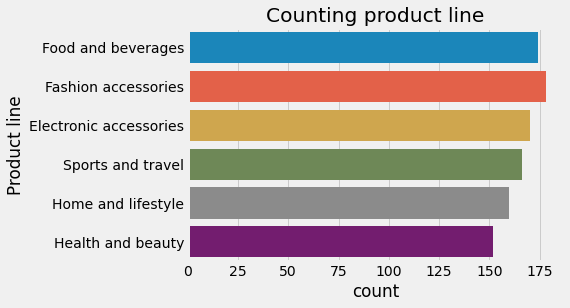

In [141]:
# determining the highest & lowest sold product line, using Countplot
sns.countplot(y='Product line',data=df).set(title="Counting product line")

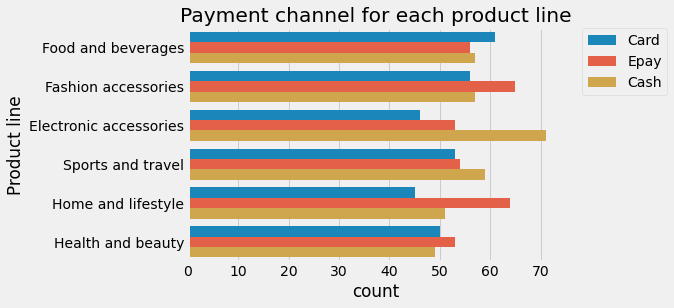

In [145]:
#Determine the Payment channel used by most customer to pay for each product line. 
#Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, 
#and use the "hue" parameter for the "Payment" column.
sns.countplot(y='Product line', hue="Payment",data=df).set(title="Payment channel for each product line")
# to keep the legend outside so as to be able to view the data well
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

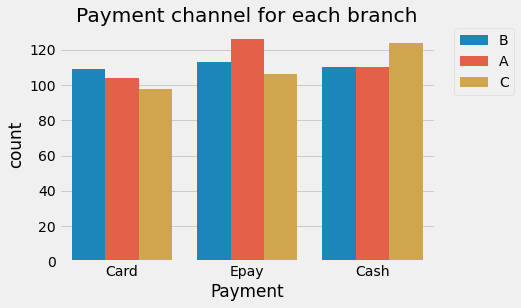

In [147]:
# determining the Payment channel for each branch
sns.countplot(x='Payment', hue="Branch",data=df).set(title="Payment channel for each branch")
# to keep the legend outside so as to be able to view the data well
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[Text(0.5, 1.0, 'Branch with lowest rating')]

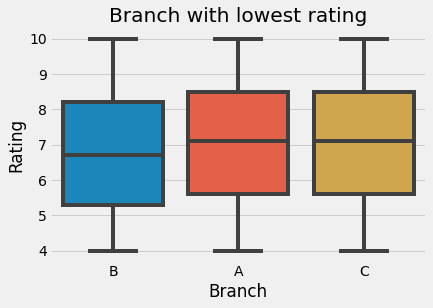

In [151]:
# determining the branch with the lowest rating using box plot
sns.boxplot(x='Branch',y='Rating',data=df).set(title="Branch with lowest rating")

### The above code shows that Branch B has the lowest rating

In [ ]:
# to show if Uas gender.